In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
aggregated_data = pd.read_csv("aggregated_data.csv")
aggregated_data.head()

,Unnamed: 0,Player,Season,AS,Age,Pos,Tm,G,GS,MP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,A.J. Green,2023,0,23,SG,29,29,0,9.8,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,3,A.J. Price,2010,0,23,PG,56,56,2,15.4,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,4,A.J. Price,2011,0,24,PG,50,50,0,15.9,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,5,A.J. Price,2012,0,25,PG,44,44,1,12.9,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9


In [3]:
data = aggregated_data.drop(columns=['Unnamed: 0'])
data.head()

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,29,29,0,9.8,1.7,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,0.8,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,A.J. Price,2010,0,23,PG,56,56,2,15.4,2.6,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.3,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,A.J. Price,2012,0,25,PG,44,44,1,12.9,1.3,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9


In [4]:
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
# data = data.rename(columns={"3P": "three_P", "3PA": "three_PA", "3PP": "three_PP", "2P": "two_P", "2PA": "two_PA", "2PP": "two_PP"})
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
data.groupby(by="Season").sum()["AS"]

Season
2009    17
2010    20
2011    17
2012    21
2013    20
2014    23
2015    25
2016    24
2017    25
2018    26
2019    25
2020    22
2021    24
2022    25
2023    23
Name: AS, dtype: int64

In [7]:
train_data = data[data["Season"] % 3 == 1]
train_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,29,29,0,9.8,1.7,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,0.8,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.3,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,A.J. Price,2014,0,27,SG,28,28,0,3.5,0.7,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,AJ Griffin,2023,0,19,SF,58,58,11,20.2,3.6,...,0.875,0.4,1.6,2.1,1.0,0.7,0.1,0.6,1.3,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,Ziaire Williams,2023,0,21,SF,31,31,3,16.0,2.2,...,0.765,0.4,1.9,2.3,0.8,0.4,0.2,1.0,1.7,5.4
6288,Zion Williamson,2020,0,19,PF,24,24,24,27.8,8.8,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6290,Zion Williamson,2023,1,22,PF,29,29,29,33.0,9.8,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0
6294,Zydrunas Ilgauskas,2011,0,35,C,72,72,51,15.9,2.3,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0


In [8]:
test_data = data[data["Season"] % 3 != 1]
test_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,A.J. Price,2010,0,23,PG,56,56,2,15.4,2.6,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
4,A.J. Price,2012,0,25,PG,44,44,1,12.9,1.3,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9
5,A.J. Price,2013,0,26,PG,57,57,22,22.4,2.8,...,0.790,0.4,1.6,2.0,3.6,0.6,0.1,1.1,1.3,7.7
8,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,4.0,...,0.866,0.4,1.6,2.0,3.0,0.6,0.1,1.6,1.9,11.2
9,Aaron Brooks,2010,0,25,PG,82,82,82,35.6,7.0,...,0.822,0.7,2.0,2.6,5.3,0.8,0.2,2.8,2.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,Zydrunas Ilgauskas,2009,0,33,C,65,65,65,27.2,5.3,...,0.799,2.4,5.1,7.5,1.0,0.4,1.3,1.4,2.8,12.9
6293,Zydrunas Ilgauskas,2010,0,34,C,64,64,6,20.9,3.0,...,0.743,1.8,3.6,5.4,0.8,0.2,0.8,1.0,2.9,7.4
6296,Álex Abrines,2018,0,24,SG,75,75,8,15.1,1.5,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
6297,Álex Abrines,2019,0,25,SG,31,31,2,19.0,1.8,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3


Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In [9]:
predictors = train_data.drop(["Player", "Season", "AS"], axis=1)
predictors.head()

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,SG,29,29,0,9.8,1.7,3.7,0.453,1.3,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,24,C,22,22,0,7.4,0.8,1.9,0.405,0.2,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,PG,50,50,0,15.9,2.3,6.4,0.356,0.8,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,SG,28,28,0,3.5,0.7,1.6,0.413,0.2,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,SF,58,58,11,20.2,3.6,7.6,0.473,1.4,...,0.875,0.4,1.6,2.1,1.0,0.7,0.1,0.6,1.3,9.1


In [10]:
predictors.corr()

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.059010,0.090819,0.086700,0.120181,0.030735,0.032380,-0.007671,0.105540,0.087429,...,0.086203,-0.039439,0.069263,0.038702,0.108241,0.041415,-0.011983,0.024565,0.025185,0.037696
Tm,0.059010,1.000000,0.808533,0.570208,0.373662,0.457443,0.447932,0.270141,0.262545,0.238701,...,0.191553,0.282800,0.420787,0.401573,0.297529,0.420661,0.249907,0.377390,0.469147,0.443585
G,0.090819,0.808533,1.000000,0.558230,0.736991,0.336588,0.341629,0.170137,0.233315,0.217608,...,0.170923,0.171201,0.301447,0.278038,0.231272,0.321624,0.162997,0.290006,0.355341,0.331326
GS,0.086700,0.570208,0.558230,1.000000,0.642110,0.680348,0.674198,0.210814,0.374494,0.370085,...,0.170249,0.382050,0.608903,0.572380,0.494526,0.569163,0.366231,0.602870,0.567314,0.670407
MP,0.120181,0.373662,0.736991,0.642110,1.000000,0.500280,0.521623,0.096767,0.391248,0.399338,...,0.186609,0.169199,0.389243,0.342332,0.396980,0.428435,0.184419,0.458761,0.411278,0.504718
FG,0.030735,0.457443,0.336588,0.680348,0.500280,1.000000,0.978783,0.323090,0.553526,0.559465,...,0.264700,0.401020,0.712856,0.654961,0.640618,0.610305,0.375366,0.828179,0.603456,0.988398
FGA,0.032380,0.447932,0.341629,0.674198,0.521623,0.978783,1.000000,0.169253,0.635547,0.655553,...,0.305118,0.292477,0.645165,0.570482,0.676461,0.628895,0.285730,0.839868,0.569510,0.981640
FGP,-0.007671,0.270141,0.170137,0.210814,0.096767,0.323090,0.169253,1.000000,-0.100238,-0.162137,...,-0.076870,0.527869,0.417767,0.476807,0.041737,0.125370,0.435641,0.173684,0.370002,0.267630
three_P,0.105540,0.262545,0.233315,0.374494,0.391248,0.553526,0.635547,-0.100238,1.000000,0.983378,...,0.379075,-0.209173,0.200161,0.081855,0.452708,0.392865,-0.086219,0.428168,0.249306,0.620393
three_PA,0.087429,0.238701,0.217608,0.370085,0.399338,0.559465,0.655553,-0.162137,0.983378,1.000000,...,0.371045,-0.215352,0.205981,0.084238,0.477322,0.409412,-0.090975,0.458405,0.253208,0.627850


In [11]:
corr_matrix = train_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop


C:\Users\msbow\AppData\Local\Temp\ipykernel_6752\2058914866.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['G',
 'MP',
 'FGA',
 'three_PA',
 'two_P',
 'two_PA',
 'two_PP',
 'eFGP',
 'FT',
 'FTA',
 'DRB',
 'TRB',
 'TOV',
 'PTS']

In [12]:
corr_matrix = train_data.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Tm', 'G'),
 ('G', 'MP'),
 ('FG', 'FGA'),
 ('FG', 'two_P'),
 ('FG', 'two_PA'),
 ('FG', 'FT'),
 ('FG', 'FTA'),
 ('FG', 'DRB'),
 ('FG', 'TOV'),
 ('FG', 'PTS'),
 ('FGA', 'two_P'),
 ('FGA', 'two_PA'),
 ('FGA', 'FT'),
 ('FGA', 'FTA'),
 ('FGA', 'TOV'),
 ('FGA', 'PTS'),
 ('FGP', 'two_PP'),
 ('FGP', 'eFGP'),
 ('three_P', 'three_PA'),
 ('two_P', 'two_PA'),
 ('two_P', 'FT'),
 ('two_P', 'FTA'),
 ('two_P', 'DRB'),
 ('two_P', 'TRB'),
 ('two_P', 'TOV'),
 ('two_P', 'PTS'),
 ('two_PA', 'FT'),
 ('two_PA', 'FTA'),
 ('two_PA', 'DRB'),
 ('two_PA', 'TOV'),
 ('two_PA', 'PTS'),
 ('two_PP', 'eFGP'),
 ('FT', 'FTA'),
 ('FT', 'TOV'),
 ('FT', 'PTS'),
 ('FTA', 'TOV'),
 ('FTA', 'PTS'),
 ('ORB', 'DRB'),
 ('ORB', 'TRB'),
 ('DRB', 'TRB'),
 ('AST', 'TOV'),
 ('TOV', 'PTS')]

In [13]:
predictors.columns

Index(['Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'three_P',
       'three_PA', 'three_PP', 'two_P', 'two_PA', 'two_PP', 'eFGP', 'FT',
       'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [14]:
logit_model_including_all = sm.logit(formula = 'AS~'+'+'.join(predictors.columns), data = train_data).fit() #Developing logistic regression model
logit_model_including_all.summary()

Optimization terminated successfully.
         Current function value: 0.073745
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 2098
Model:                          Logit   Df Residuals:                     2066
Method:                           MLE   Df Model:                           31
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.6413
Time:                        22:04:10   Log-Likelihood:                -154.72
converged:                       True   LL-Null:                       -431.37
Covariance Type:            nonrobust   LLR p-value:                 5.711e-97
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.1114      8.929     -3.820      0.000     -51.613     -16.610
Pos[T.PF]      1.6361      0.594      2.756      0.006       0.473       2.799
Pos[T.PG]      0.2188      0.944      0.232      0.817      -1.632       2.069
Pos[T.SF]      1.2553      0.798      1.573      0.116      -0.309       2.819
Pos[T.SG]      0.7489      0.905      0.828      0.408      -1.024       2.522
Age            0.0780      0.042      1.871      0.061      -0.004       0.160
Tm             0.0390      0.049      0.803      0.422      -0.056       0.134
G             -0.1465      0.099     -1.485      0.137      -0.340       0.047
GS             0.1347      0.091      1.485      0.138      -0.043       0.312
MP             0.0052      0.043      0.120      0.904      -0.080       0.090
FG             3.5533      4.582      0.775      0.438      -5.427      12.534
FGA           -0.1403      2.911     -0.048      0.962      -5.845       5.564
FGP           73.0584     25.612      2.852      0.004      22.860     123.257
three_P       -1.6121      4.426     -0.364      0.716     -10.287       7.063
three_PA       1.1352      2.911      0.390      0.697      -4.570       6.841
three_PP       2.1917      1.699      1.290      0.197      -1.138       5.522
two_P         -3.6307      3.513     -1.033      0.301     -10.516       3.255
two_PA         1.1658      2.892      0.403      0.687      -4.502       6.834
two_PP       -18.8429     16.322     -1.154      0.248     -50.833      13.147
eFGP         -24.3868     27.103     -0.900      0.368     -77.507      28.734
FT             0.2902      2.151      0.135      0.893      -3.926       4.507
FTA            0.8825      0.700      1.261      0.207      -0.489       2.254
FTP            7.0961      5.348      1.327      0.185      -3.386      17.578
ORB           -2.1349      3.205     -0.666      0.505      -8.416       4.146
DRB           -1.8337      3.154     -0.581      0.561      -8.015       4.347
TRB            2.1020      3.167      0.664      0.507      -4.105       8.309
AST            0.5499      0.147      3.734      0.000       0.261       0.838
STL            0.7010      0.470      1.492      0.136      -0.220       1.622
BLK            0.8739      0.405      2.159      0.031       0.081       1.667
TOV           -0.4511      0.394     -1.146      0.252      -1.223       0.321
PF             0.0477      0.326      0.146      0.884      -0.592       0.687
PTS           -0.9140      2.050     -0.446      0.656      -4.933       3.105
==============================================================================

Possibly complete quasi-separation: A fraction 0.65 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Classification accuracy

In [15]:
#Function to compute confusion matrix and prediction accuracy on training data

def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Train

Classification accuracy = 97.2%


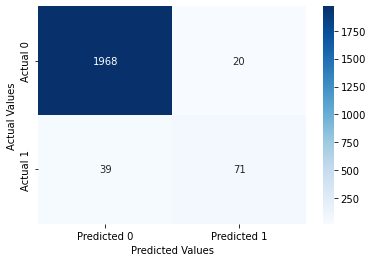

In [16]:
cm_train = confusion_matrix_train(logit_model_including_all)

The prediction accuracy was found to be 96.7% for train data.

In [17]:
#Function to compute confusion matrix and prediction accuracy on test data

def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Test

Classification accuracy = 96.4%


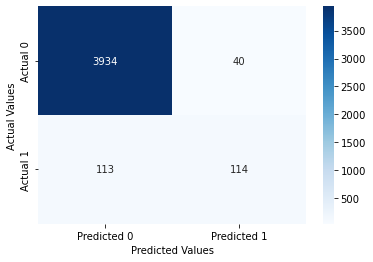

In [18]:
confusion_matrix_test(test_data,test_data.AS,logit_model_including_all)

The prediction accuracy was found to be 95.0% for test data.

Recall

What is the minimum Recall of the model among the Recall performance on train data and test data? Consider a decision threshold probability of 30% when classifying observations.

Here, Recall is the proportion of players predicted to take part in the all star team among those who actually turn out to become all stars.

Recall: Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

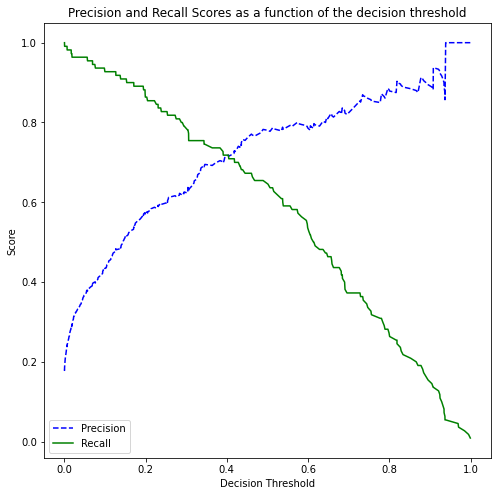

In [19]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y = train_data.AS
ypred = logit_model_including_all.predict(train_data)
p, r, thresholds = precision_recall_curve(y, ypred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()

plot_precision_recall_vs_threshold(p, r, thresholds)

AUC:  0.9809630510334736


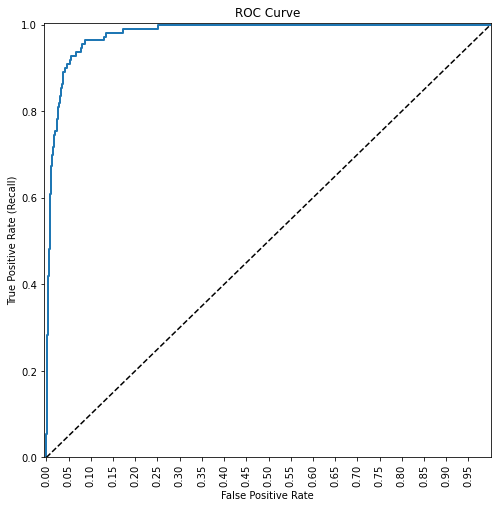

In [20]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot(fpr[np.argmax(net_profit_array_notperperson)+1],tpr[np.argmax(net_profit_array_notperperson)+1], marker="o")
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print("AUC: ", auc(fpr, tpr))# AUC of ROC

plot_roc_curve(fpr, tpr)

In [21]:
#Function to compute confusion matrix and prediction accuracy on test/train data

def confusion_matrix_data(data,actual_values,model,cutoff=0.3):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Train

Classification accuracy = 96.4%
Precision = 62.3%
TPR or Recall = 78.2%
FNR = 21.8%
FPR = 2.6%
ROC-AUC = 98.1%


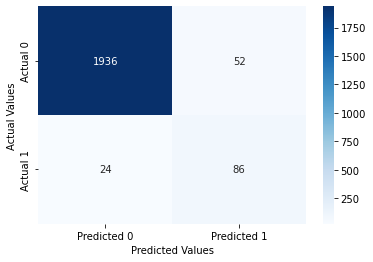

In [22]:
confusion_matrix_data(train_data,train_data.AS,logit_model_including_all,0.3)

Test

Classification accuracy = 96.1%
Precision = 62.9%
TPR or Recall = 66.5%
FNR = 33.5%
FPR = 2.2%
ROC-AUC = 97.6%


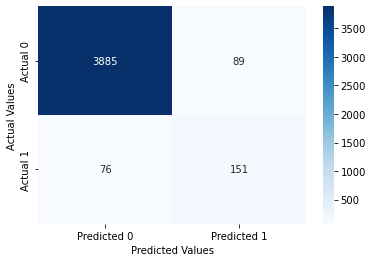

In [23]:
confusion_matrix_data(test_data,test_data.AS,logit_model_including_all,0.3)

Model Improvement (Variable Selection Methods to increase interpretability) 

In [24]:
predictors

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,SG,29,29,0,9.8,1.7,3.7,0.453,1.3,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,24,C,22,22,0,7.4,0.8,1.9,0.405,0.2,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,PG,50,50,0,15.9,2.3,6.4,0.356,0.8,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,SG,28,28,0,3.5,0.7,1.6,0.413,0.2,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,SF,58,58,11,20.2,3.6,7.6,0.473,1.4,...,0.875,0.4,1.6,2.1,1.0,0.7,0.1,0.6,1.3,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,21,SF,31,31,3,16.0,2.2,5.3,0.411,0.6,...,0.765,0.4,1.9,2.3,0.8,0.4,0.2,1.0,1.7,5.4
6288,19,PF,24,24,24,27.8,8.8,15.0,0.583,0.3,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6290,22,PF,29,29,29,33.0,9.8,16.2,0.608,0.2,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0
6294,35,C,72,72,51,15.9,2.3,4.4,0.508,0.0,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0


In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_predictors = predictors.select_dtypes(include=numerics)
numeric_predictors

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,29,29,0,9.8,1.7,3.7,0.453,1.3,3.1,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,24,22,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,50,50,0,15.9,2.3,6.4,0.356,0.8,3.0,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,28,28,0,3.5,0.7,1.6,0.413,0.2,0.8,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,58,58,11,20.2,3.6,7.6,0.473,1.4,3.7,...,0.875,0.4,1.6,2.1,1.0,0.7,0.1,0.6,1.3,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,21,31,31,3,16.0,2.2,5.3,0.411,0.6,2.7,...,0.765,0.4,1.9,2.3,0.8,0.4,0.2,1.0,1.7,5.4
6288,19,24,24,24,27.8,8.8,15.0,0.583,0.3,0.6,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6290,22,29,29,29,33.0,9.8,16.2,0.608,0.2,0.7,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0
6294,35,72,72,51,15.9,2.3,4.4,0.508,0.0,0.0,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_predictors = add_constant(numeric_predictors)
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_predictors.columns

for i in range(len(numeric_predictors.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(numeric_predictors.values, i)
sorted_vif = vif_data.sort_values(by="VIF", ascending=False)
print(sorted_vif)

sorted_vif[sorted_vif["VIF"] > 10]

     feature          VIF
7        FGA  9401.400966
27       PTS  7473.448270
13    two_PA  5807.857400
6         FG  5134.191095
21       TRB  2658.409107
12     two_P  1941.710923
10  three_PA  1846.971084
20       DRB  1465.051264
9    three_P   520.836301
16        FT   481.492596
19       ORB   271.143789
0      const   194.641323
17       FTA    77.191524
8        FGP    22.874669
3          G    20.384164
15      eFGP    18.093039
2         Tm    13.910858
5         MP    11.423393
25       TOV     8.390431
14    two_PP     5.143072
22       AST     4.774643
4         GS     3.256995
26        PF     2.806084
23       STL     2.373819
24       BLK     2.265718
11  three_PP     1.984655
18       FTP     1.890649
1        Age     1.096248


,feature,VIF
7,FGA,9401.400966
27,PTS,7473.448270
13,two_PA,5807.857400
6,FG,5134.191095
21,TRB,2658.409107
12,two_P,1941.710923
10,three_PA,1846.971084
20,DRB,1465.051264
9,three_P,520.836301
16,FT,481.492596


Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

FGA, PTS, two_PA, FG, TRB, two_P, three_PA, DRB all have VIF values greater than 1000 meaning that these variables are perfectly correlated with each other (perfect multicollinearity). We shouldn't have all of these variables included in the model at the same time. Having them all included in the model won't increase accuracy by much and in fact decrease interpretability and lead to incorrect inferences of the model.

Using Forward Selection

In [27]:
X = predictors.drop(["Pos"], axis=1)
X

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,29,29,0,9.8,1.7,3.7,0.453,1.3,3.1,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,24,22,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,50,50,0,15.9,2.3,6.4,0.356,0.8,3.0,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,28,28,0,3.5,0.7,1.6,0.413,0.2,0.8,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,58,58,11,20.2,3.6,7.6,0.473,1.4,3.7,...,0.875,0.4,1.6,2.1,1.0,0.7,0.1,0.6,1.3,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,21,31,31,3,16.0,2.2,5.3,0.411,0.6,2.7,...,0.765,0.4,1.9,2.3,0.8,0.4,0.2,1.0,1.7,5.4
6288,19,24,24,24,27.8,8.8,15.0,0.583,0.3,0.6,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6290,22,29,29,29,33.0,9.8,16.2,0.608,0.2,0.7,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0
6294,35,72,72,51,15.9,2.3,4.4,0.508,0.0,0.0,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0


In [28]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('AS~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [29]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [30]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
# models_best = pd.DataFrame(columns=["Rsquared", "model"])

# tic = time.time()
# for i in range(1,1+X.shape[1]):
#     models_best.loc[i] = getBest_model(i)

# toc = time.time()
# print("Total elapsed time:", (toc-tic), "seconds.")

In [31]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')
    print("RSADJ.ARGMIN + 1, RSADJ.MIN: ", 1+rsquared_adj.argmax(), rsquared_adj.max() )

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')
    print("AIC.ARGMIN + 1, AIC.MIN: ", 1+aic.argmin(), aic.min() )

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    print("BIC.ARGMIN + 1, BIC.MIN: ", 1+bic.argmin(), bic.min() )
# best_sub_plots()

In [32]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [33]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [34]:
models_best = forward_selection()

Processed  27 models on 1 predictors in 0.08499979972839355 seconds.
Processed  26 models on 2 predictors in 0.09149980545043945 seconds.
Processed  25 models on 3 predictors in 0.10700082778930664 seconds.
Processed  24 models on 4 predictors in 0.1314992904663086 seconds.
Processed  23 models on 5 predictors in 0.6584987640380859 seconds.
Processed  22 models on 6 predictors in 0.18900203704833984 seconds.
Processed  21 models on 7 predictors in 0.19250059127807617 seconds.
Processed  20 models on 8 predictors in 0.19350218772888184 seconds.
Processed  19 models on 9 predictors in 0.2070000171661377 seconds.
Processed  18 models on 10 predictors in 0.1959989070892334 seconds.
Processed  17 models on 11 predictors in 0.21299505233764648 seconds.
Processed  16 models on 12 predictors in 0.2134995460510254 seconds.
Processed  15 models on 13 predictors in 0.21500039100646973 seconds.
Processed  14 models on 14 predictors in 0.21649861335754395 seconds.
Processed  13 models on 15 predict

the lower the AIC/BIC value, the better fitting model

RSADJ.ARGMIN + 1, RSADJ.MIN:  17 0.3675681954583254
AIC.ARGMIN + 1, AIC.MIN:  17 -1286.9159285815358
BIC.ARGMIN + 1, BIC.MIN:  7 -1199.0076014600866


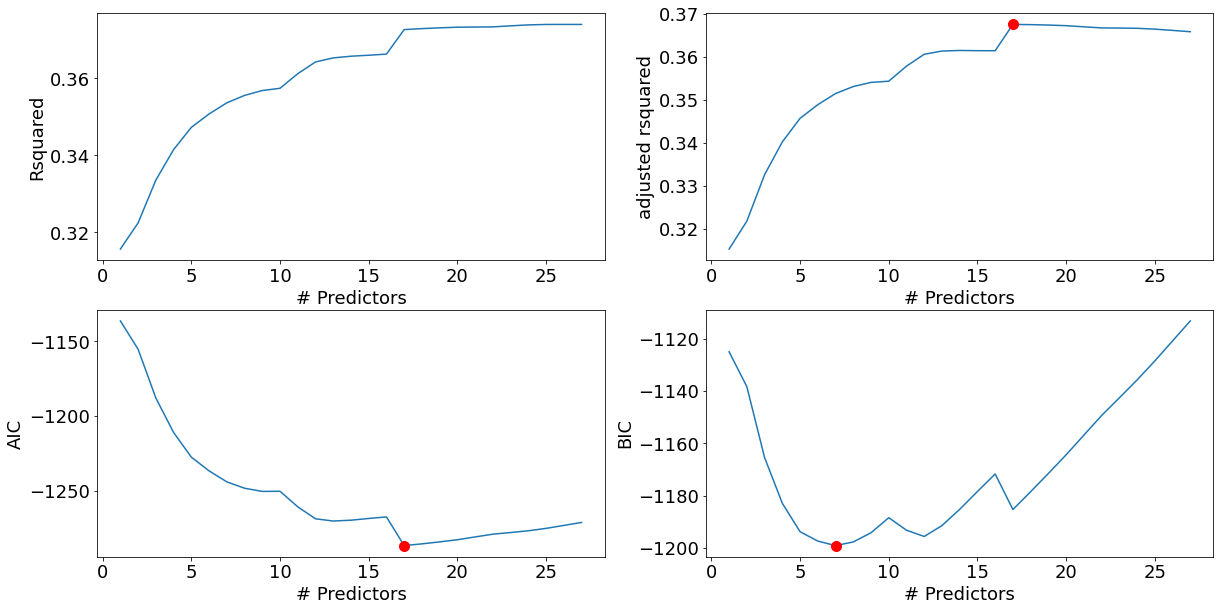

In [35]:
best_sub_plots()

The model with 17 predictors is the best model based on the AIC criterion, and very close to the best model based on the BIC and adjusted R-squared criteria. Let us select the model with 17 predictors.

In [36]:
best_fwd_reg_model = models_best['model'][17]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     72.69
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          4.59e-196
Time:                        22:04:17   Log-Likelihood:                 661.46
No. Observations:                2098   AIC:                            -1287.
Df Residuals:                    2080   BIC:                            -1185.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1438      0.042      3.408      0.001       0.061       0.227
FT             0.0825      0.006     14.821      0.000       0.072       0.093
PF            -0.0307      0.009     -3.511      0.000      -0.048      -0.014
DRB            0.0251      0.005      5.140      0.000       0.016       0.035
AST            0.0259      0.004      5.834      0.000       0.017       0.035
MP            -0.0044      0.001     -5.684      0.000      -0.006      -0.003
TOV           -0.0367      0.013     -2.730      0.006      -0.063      -0.010
FTP           -0.0984      0.034     -2.913      0.004      -0.165      -0.032
ORB           -0.0266      0.010     -2.590      0.010      -0.047      -0.006
BLK            0.0209      0.014      1.468      0.142      -0.007       0.049
FGA           -0.0316      0.007     -4.323      0.000      -0.046      -0.017
FG             0.0715      0.016      4.580      0.000       0.041       0.102
FGP           -0.5162      0.149     -3.466      0.001      -0.808      -0.224
eFGP           0.2958      0.122      2.429      0.015       0.057       0.535
GS             0.0005      0.000      2.289      0.022    7.41e-05       0.001
STL            0.0260      0.015      1.778      0.075      -0.003       0.055
Tm            -0.0030      0.001     -4.651      0.000      -0.004      -0.002
G              0.0027      0.001      4.597      0.000       0.002       0.004
==============================================================================
Omnibus:                      942.101   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7944.188
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      11.732   Cond. No.                     4.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 92.5%
Precision = 58.0%
TPR or Recall = 69.1%
FNR = 30.9%
FPR = 5.1%
ROC-AUC = 96.7%


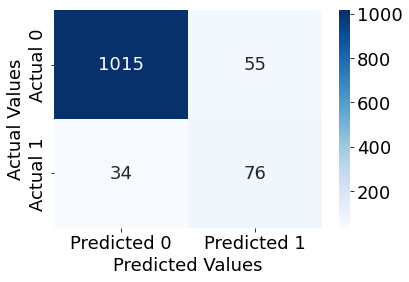

In [37]:
confusion_matrix_data(train_data,train_data.AS,best_fwd_reg_model,0.3)

Classification accuracy = 92.8%
Precision = 62.7%
TPR or Recall = 65.2%
FNR = 34.8%
FPR = 4.2%
ROC-AUC = 96.9%


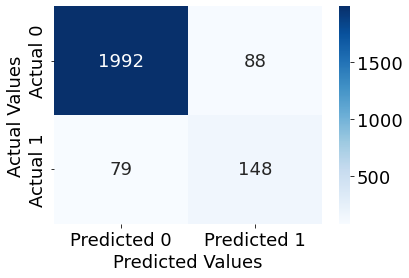

In [38]:
confusion_matrix_data(test_data,test_data.AS,best_fwd_reg_model,0.3)